In [1]:
# Importing Generic libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Importing Outliers library
from scipy import stats

# Importing Encode library
from sklearn.preprocessing import LabelEncoder

# Importing Skewness library
from sklearn.preprocessing import power_transform

# Importing Scaling library
from sklearn.preprocessing import StandardScaler

# Importing Regression models library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing Metrics library
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing Train Test Split Library
from sklearn.model_selection import train_test_split

# Importing Optimization Library
from sklearn.model_selection import GridSearchCV

# Importing Cross validation Library
from sklearn.model_selection import cross_val_score

# Importing Warnings
import warnings
warnings.filterwarnings("ignore")

In [47]:
#Importing train Dataset
df=pd.read_csv('Cars_price.csv')

In [48]:
#Checking train Dataset
df.head()

,Unnamed: 0,Brand,Model,Location,Year,Driven_km,Fuel,Owners_number,Price
0,0,Toyota,Innova,Bangalore,2019,"14,113 Kms",Diesel,First,23.25 Lakh
1,1,Maruti Suzuki,Wagon R,Hyderabad,2015,"50,258 Kms",Petrol,First,4.4 Lakh
2,2,Mercedes-Benz,S-Class,Mumbai,2011,"51,086 Kms",Diesel,First,25 Lakh
3,3,Maruti Suzuki,Alto 800,Delhi,2018,"34,000 Kms",Petrol,First,3.1 Lakh
4,4,Volkswagen,Vento,Mumbai,2016,"45,259 Kms",Petrol,First,6.95 Lakh


We dropped all unnecessary columns from the dataframe. Let's check the features present in our data.

In [49]:
#Checking Shape of train Dataframe
df.shape

(5239, 9)

We have 5239 independent variables and 1 target variable. Next, let's look at null value are there in our dataset or not.

In [50]:
#Checking Nullvalues in the Dataframe
df.isnull().sum()

Unnamed: 0       0
Brand            0
Model            0
Location         0
Year             0
Driven_km        0
Fuel             0
Owners_number    0
Price            0
dtype: int64

In two column we find the null values. So we will replace them by their mean and mode in both the columns as follows

In [51]:
# replacing letter symbols from driven_km and price so that we have numbers only in these column.
df.replace({'Driven_km':{'[A-za-z]',',','-'}},'',regex = True,inplace = True)
df.replace({'Price':{'[A-za-z]',',','-'}},'',regex = True,inplace = True)

In [52]:
df

,Unnamed: 0,Brand,Model,Location,Year,Driven_km,Fuel,Owners_number,Price
0,0,Toyota,Innova,Bangalore,2019,14113,Diesel,First,23.25
1,1,Maruti Suzuki,Wagon R,Hyderabad,2015,50258,Petrol,First,4.4
2,2,Mercedes-Benz,S-Class,Mumbai,2011,51086,Diesel,First,25
3,3,Maruti Suzuki,Alto 800,Delhi,2018,34000,Petrol,First,3.1
4,4,Volkswagen,Vento,Mumbai,2016,45259,Petrol,First,6.95
...,...,...,...,...,...,...,...,...,...
5234,5234,Mercedes-Benz,E-Class,Delhi,2018,38200,Diesel,First,47
5235,5235,Mercedes-Benz,CLA,Delhi,2017,35600,Diesel,Second,27
5236,5236,-,-,-,-,,-,-,
5237,5237,Mercedes-Benz,E-Class,Delhi,2013,95200,Diesel,First,16.5


Counting different column values present in dataset, so that we can analyse the data accordingly.

In [53]:
df['Model'].value_counts()

Innova     193
City       182
Creta      170
Swift      166
-          156
          ... 
Huracan      1
Triber       1
X-Trail      1
Sumo         1
Gloster      1
Name: Model, Length: 229, dtype: int64

In [54]:
df['Brand'].value_counts()

Maruti Suzuki       1097
Hyundai              849
Honda                415
Toyota               414
Mahindra             306
Mercedes-Benz        305
BMW                  252
Volkswagen           233
Ford                 231
Audi                 197
-                    156
Renault              135
Skoda                122
Tata                 102
Nissan                53
Land Rover            50
Chevrolet             48
Jaguar                38
Volvo                 37
Kia                   36
MG                    31
Jeep                  28
MINI                  28
Datsun                21
Porsche               16
Mitsubishi            10
Fiat                  10
Lamborghini            4
Maserati               3
Lexus                  3
Ssangyong              3
Bentley                2
Hindustan Motors       2
Opel                   2
Name: Brand, dtype: int64

In [55]:
df['Location'].value_counts()

Mumbai             917
Delhi              794
Bangalore          544
Hyderabad          336
Ahmedabad          308
Pune               306
Chennai            213
-                  156
Kolkata            148
Lucknow            126
Coimbatore         121
Thane              107
Dehradun            79
Raipur              79
Gurgaon             72
Ghaziabad           69
Navi Mumbai         68
Surat               60
Chandigarh          59
Nagpur              58
Meerut              53
Tiruchirappalli     49
Jaipur              48
Faridabad           44
Kanpur              41
Madurai             34
Ludhiana            30
Mohali              27
Mangalore           27
Udaipur             22
Bhopal              22
Aurangabad          21
Jaunpur             20
Kochi               18
Karnal              18
Noida               16
Agra                16
Jalandhar           15
Kharar              15
Ranchi              15
Vadodara            14
Visakhapatnam       13
Varanasi            11
Nashik     

In [56]:
df['Year'].value_counts()

2017    710
2018    655
2016    650
2014    515
2015    512
2019    397
2013    382
2012    351
2011    260
2020    204
2010    160
-       156
2009    107
2008     50
2007     39
2021     30
2005     24
2006     21
2004      5
2003      4
2002      2
1988      2
1996      2
2001      1
Name: Year, dtype: int64

In [57]:
df['Fuel'].value_counts()

Diesel      2704
Petrol      2315
-            156
CNG           49
Hybrid         8
Electric       5
LPG            2
Name: Fuel, dtype: int64

In [58]:
df['Owners_number'].value_counts()

First               4054
Second               901
-                    156
Third                101
UnRegistered Car      24
4 or More              2
Fourth                 1
Name: Owners_number, dtype: int64

In [59]:
# replacing NaN value by mode values in our dataset column.
df['Owners_number']=df['Owners_number'].replace('-','First')
df['Fuel']=df['Fuel'].replace('-','Diesel')
df['Year']=df['Year'].replace('-','2017')
df['Brand']=df['Brand'].replace('-','Maruti Suzuki ')
df['Model']=df['Model'].replace('-','Innova')
df['Location']=df['Location'].replace('-','Mumbai')

In [60]:
# converting str to float
df['Driven_km'] = pd.to_numeric(df['Driven_km'])
df['Price'] = pd.to_numeric(df['Price'])
df['Year'] = pd.to_numeric(df['Year'])

In [61]:
df

,Unnamed: 0,Brand,Model,Location,Year,Driven_km,Fuel,Owners_number,Price
0,0,Toyota,Innova,Bangalore,2019,14113.0,Diesel,First,23.25
1,1,Maruti Suzuki,Wagon R,Hyderabad,2015,50258.0,Petrol,First,4.40
2,2,Mercedes-Benz,S-Class,Mumbai,2011,51086.0,Diesel,First,25.00
3,3,Maruti Suzuki,Alto 800,Delhi,2018,34000.0,Petrol,First,3.10
4,4,Volkswagen,Vento,Mumbai,2016,45259.0,Petrol,First,6.95
...,...,...,...,...,...,...,...,...,...
5234,5234,Mercedes-Benz,E-Class,Delhi,2018,38200.0,Diesel,First,47.00
5235,5235,Mercedes-Benz,CLA,Delhi,2017,35600.0,Diesel,Second,27.00
5236,5236,Maruti Suzuki,Innova,Mumbai,2017,NaN,Diesel,First,NaN
5237,5237,Mercedes-Benz,E-Class,Delhi,2013,95200.0,Diesel,First,16.50


In [62]:
# finding mean of driven_km
mean1=df['Driven_km'].mean()
mean1

55419.78024788511

In [63]:
# finding mean of Price
mean2=df['Price'].mean()
mean2

189.33912846744045

In [64]:
# replacing NaN value by mean values in our dataset column.
df['Price']=df['Price'].replace(np.NaN,189.33)
df['Driven_km']=df['Driven_km'].replace(np.NaN,55419.78)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5239 entries, 0 to 5238
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5239 non-null   int64  
 1   Brand          5239 non-null   object 
 2   Model          5239 non-null   object 
 3   Location       5239 non-null   object 
 4   Year           5239 non-null   int64  
 5   Driven_km      5239 non-null   float64
 6   Fuel           5239 non-null   object 
 7   Owners_number  5239 non-null   object 
 8   Price          5239 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 368.5+ KB


In [66]:
df

,Unnamed: 0,Brand,Model,Location,Year,Driven_km,Fuel,Owners_number,Price
0,0,Toyota,Innova,Bangalore,2019,14113.00,Diesel,First,23.25
1,1,Maruti Suzuki,Wagon R,Hyderabad,2015,50258.00,Petrol,First,4.40
2,2,Mercedes-Benz,S-Class,Mumbai,2011,51086.00,Diesel,First,25.00
3,3,Maruti Suzuki,Alto 800,Delhi,2018,34000.00,Petrol,First,3.10
4,4,Volkswagen,Vento,Mumbai,2016,45259.00,Petrol,First,6.95
...,...,...,...,...,...,...,...,...,...
5234,5234,Mercedes-Benz,E-Class,Delhi,2018,38200.00,Diesel,First,47.00
5235,5235,Mercedes-Benz,CLA,Delhi,2017,35600.00,Diesel,Second,27.00
5236,5236,Maruti Suzuki,Innova,Mumbai,2017,55419.78,Diesel,First,189.33
5237,5237,Mercedes-Benz,E-Class,Delhi,2013,95200.00,Diesel,First,16.50


# EDA

(array([5.227e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 5.000e+00]),
 array([1.00000e+00, 9.90090e+03, 1.98008e+04, 2.97007e+04, 3.96006e+04,
        4.95005e+04, 5.94004e+04, 6.93003e+04, 7.92002e+04, 8.91001e+04,
        9.90000e+04]),
 <a list of 10 Patch objects>)

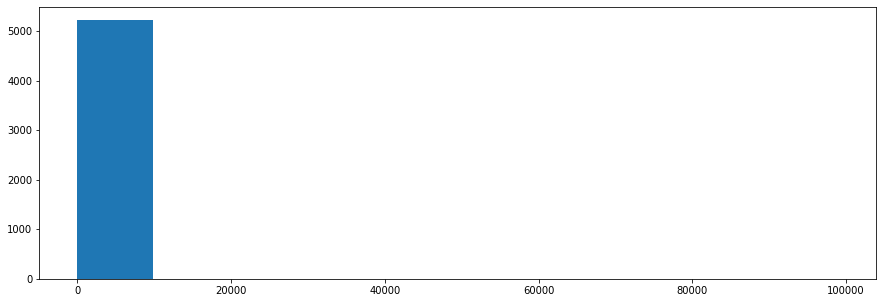

In [82]:
# Ploting Histogram graph/ Univariate Analysis
plt.figure(figsize=[15,5])
plt.hist(df['Price'])

From this garph we can observe that Price of cars in our dataset. The value of price is in lakhs.  

(array([4.722e+03, 4.860e+02, 2.100e+01, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 4.000e+00]),
 array([     0.,  92000., 184000., 276000., 368000., 460000., 552000.,
        644000., 736000., 828000., 920000.]),
 <a list of 10 Patch objects>)

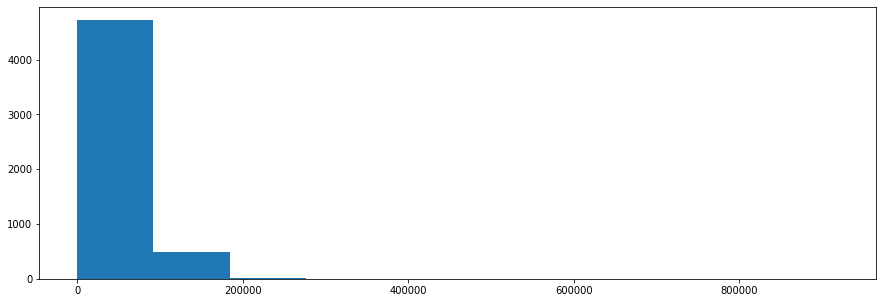

In [81]:
# Ploting Histogram graph/ Univariate Analysis
plt.figure(figsize=[15,5])
plt.hist(df['Driven_km'])

We can observe that in this graph driven_km is maximum from 0 to 100000 km in our data and above 200000 is minimum.

<BarContainer object of 5239 artists>

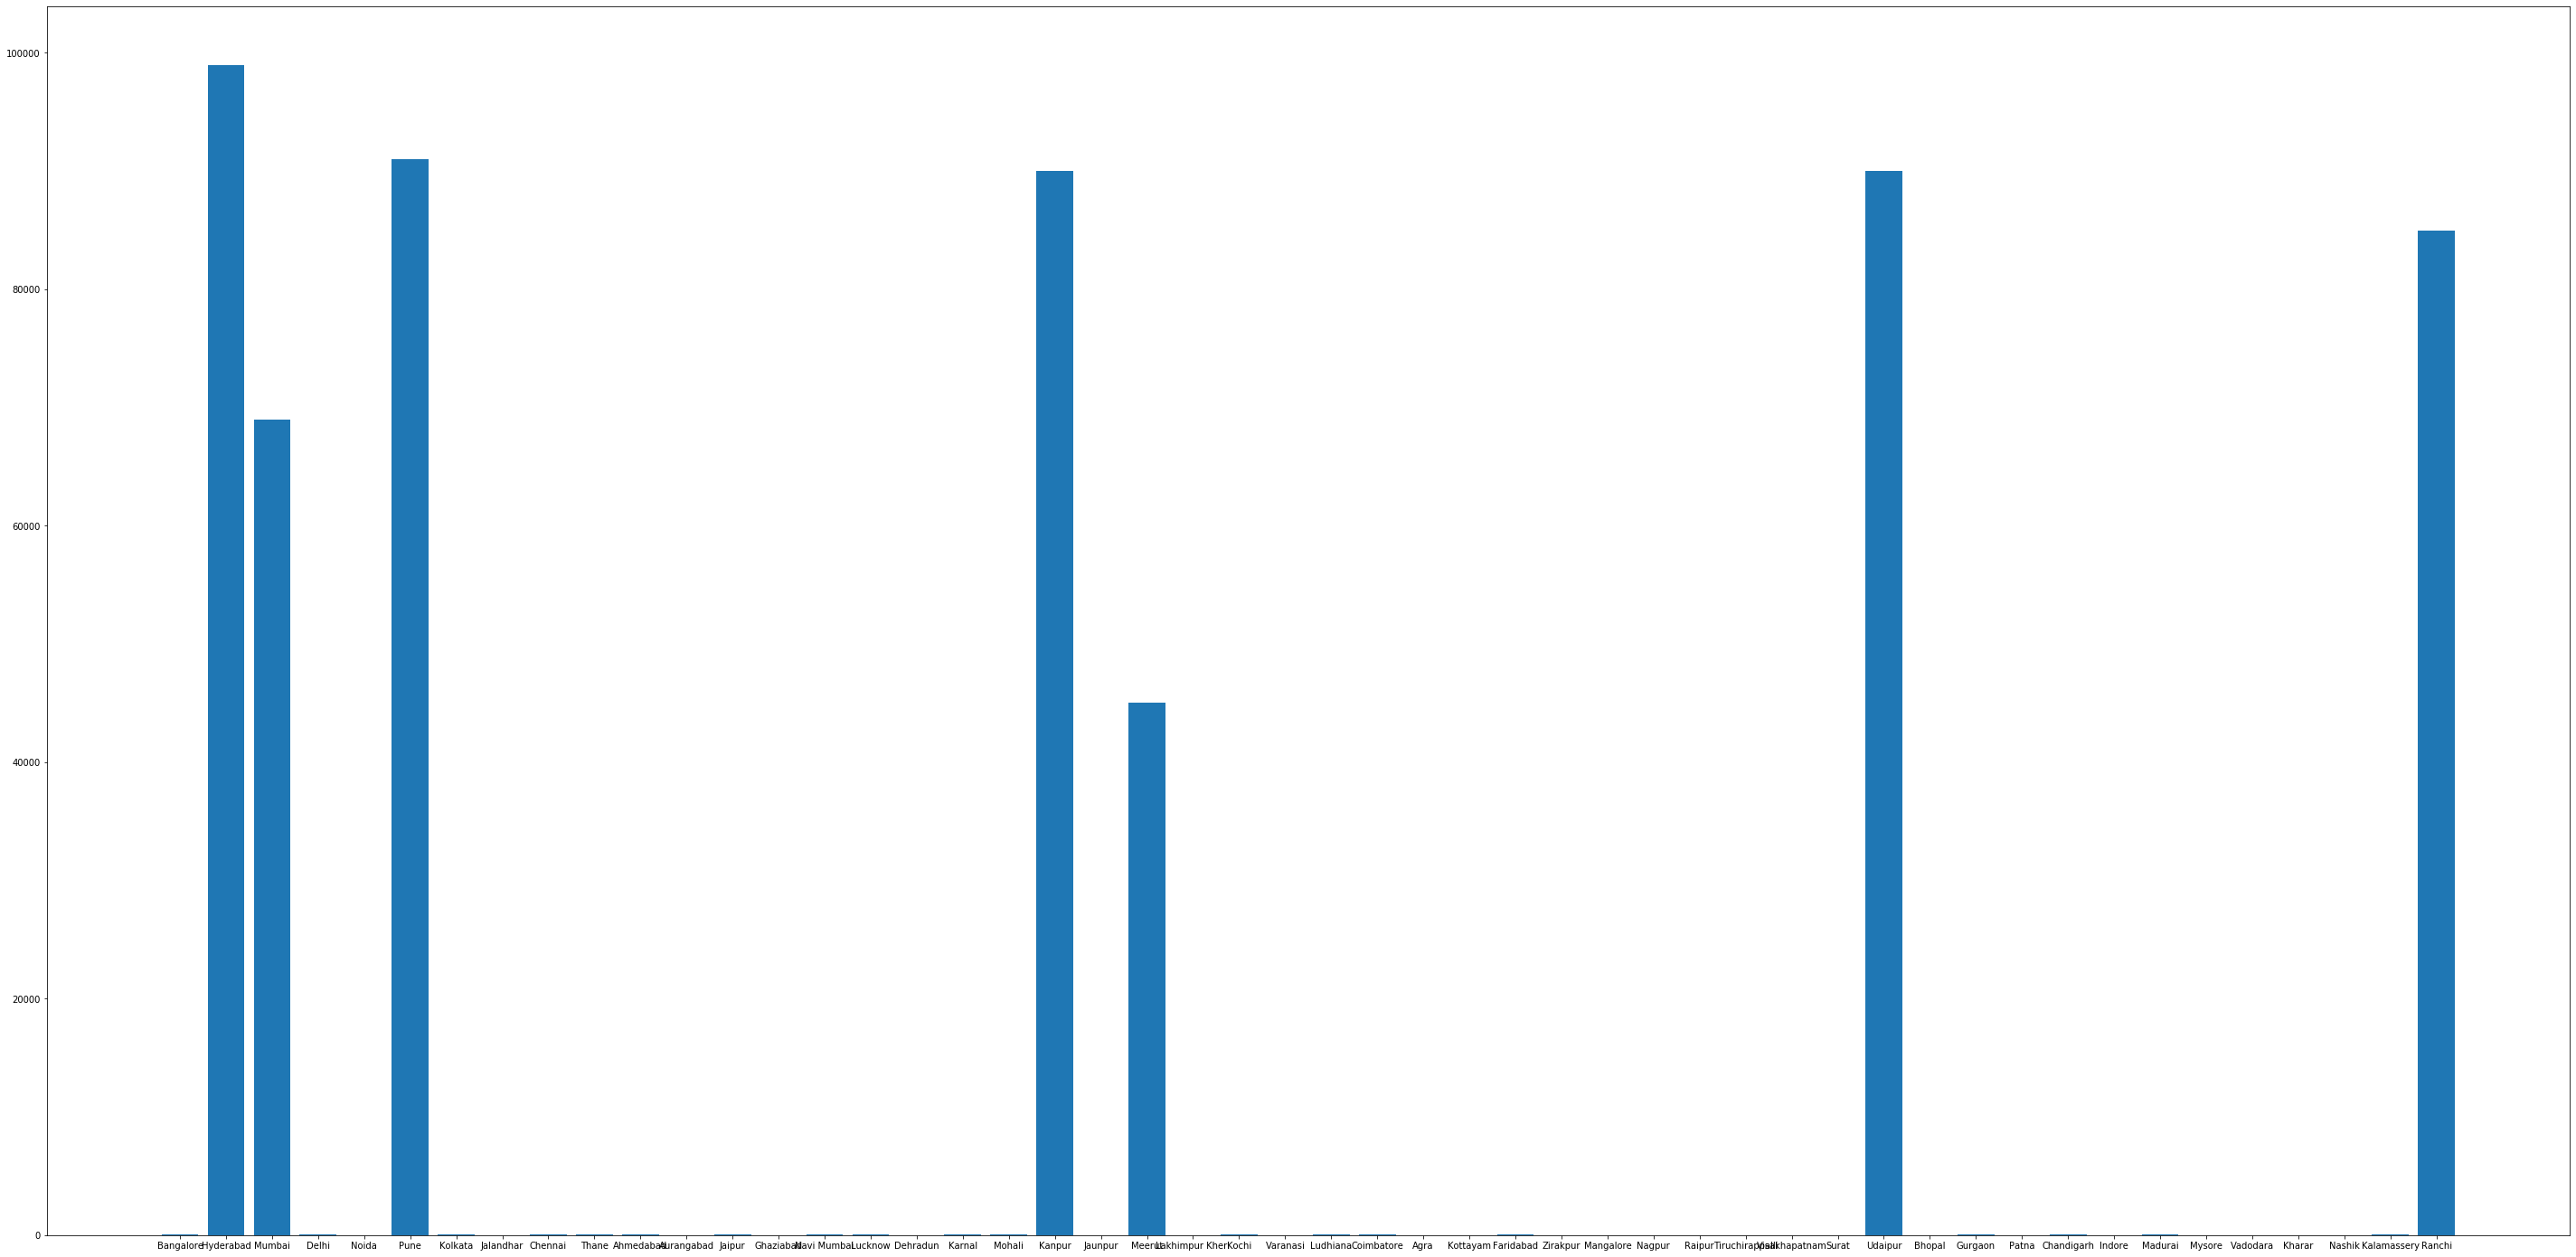

In [76]:
# Ploting Bar graph / Bivariate Analysis
plt.figure(figsize=[50,25])
plt.bar(df['Location'],df['Price'])

From this graph we can observe that only few city have maximum saling of cars, exculding those we have very less cities in which cars are solding. And counting of such cities are maximum in which cars are solding.

<BarContainer object of 5239 artists>

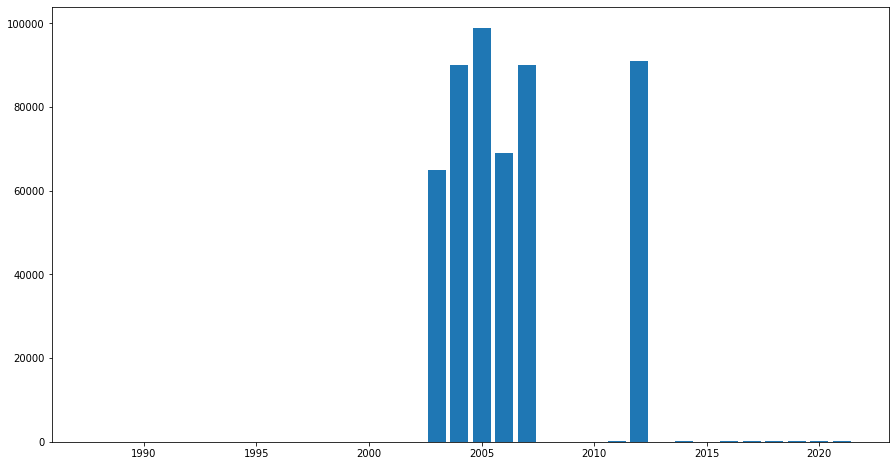

In [72]:
#Ploting Bar graph / Bivariate Analysis
plt.figure(figsize=[15,8])
plt.bar(df['Year'],df['Price'])

From this graph we can conclude that car manufactured in 2003 to 2007 is more otherwise recent manufactured car in last 5-6 years are solding less.

<BarContainer object of 5239 artists>

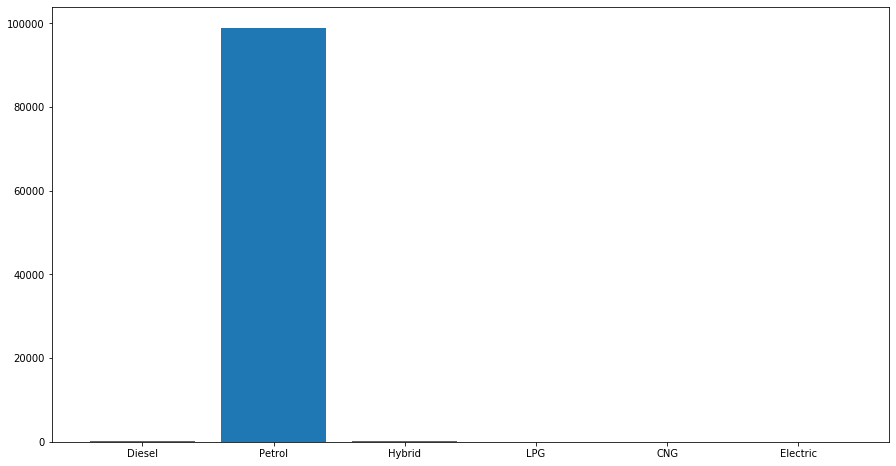

In [84]:
# Ploting Bar graph / Bivariate Analysis
plt.figure(figsize=[15,8])
plt.bar(df['Fuel'],df['Price'])

From this graph we can conclude that car use petrol as fuel are solding more as compare to Diesel and hybrid. And no car using CNG of electric on solding in our dataset.

<BarContainer object of 5239 artists>

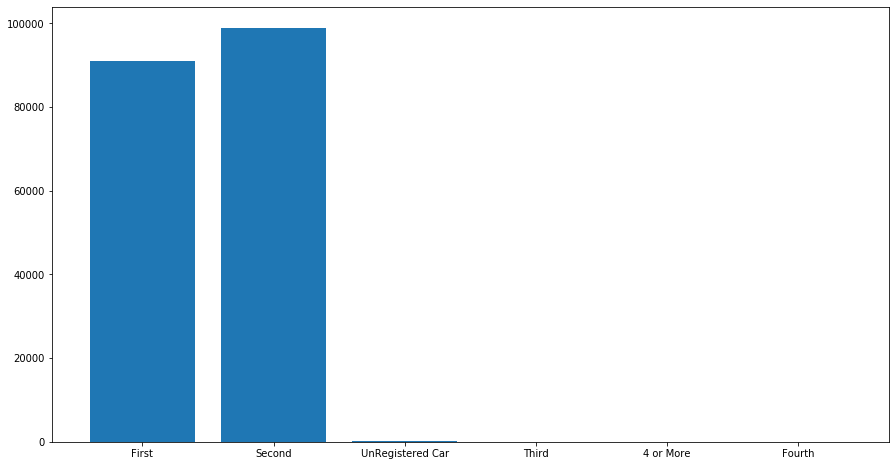

In [86]:
# Ploting Bar graph / Bivariate Analysis
plt.figure(figsize=[15,8])
plt.bar(df['Owners_number'],df['Price'])

From this graph we can conclude that second owner car is having more price then first owner and unregistered car.

# Label encoding of train dataset

We noticed before that some columns have object datatype, that needs to change to numeric (either int or float) datatype, so that our model can read the data.

In [25]:
# Converting categorical data into numerical values in our dataset.
le=LabelEncoder() # Calling Label encoding function
df['Brand']=le.fit_transform(df['Brand'])
df['Model']=le.fit_transform(df['Model'])
df['Location']=le.fit_transform(df['Location'])
df['Fuel']=le.fit_transform(df['Fuel'])
df['Owners_number']=le.fit_transform(df['Owners_number'])

In [26]:
#Checking Converted trin dataset
df.head()

,Unnamed: 0,Brand,Model,Location,Year,Driven_km,Fuel,Owners_number,Price
0,0,31,111,3,2019,14113.0,1,1,23.25
1,1,19,200,13,2015,50258.0,5,1,4.40
2,2,22,158,32,2011,51086.0,1,1,25.00
3,3,19,21,9,2018,34000.0,5,1,3.10
4,4,32,194,32,2016,45259.0,5,1,6.95


We can notice that all string values are converted to numeric values.

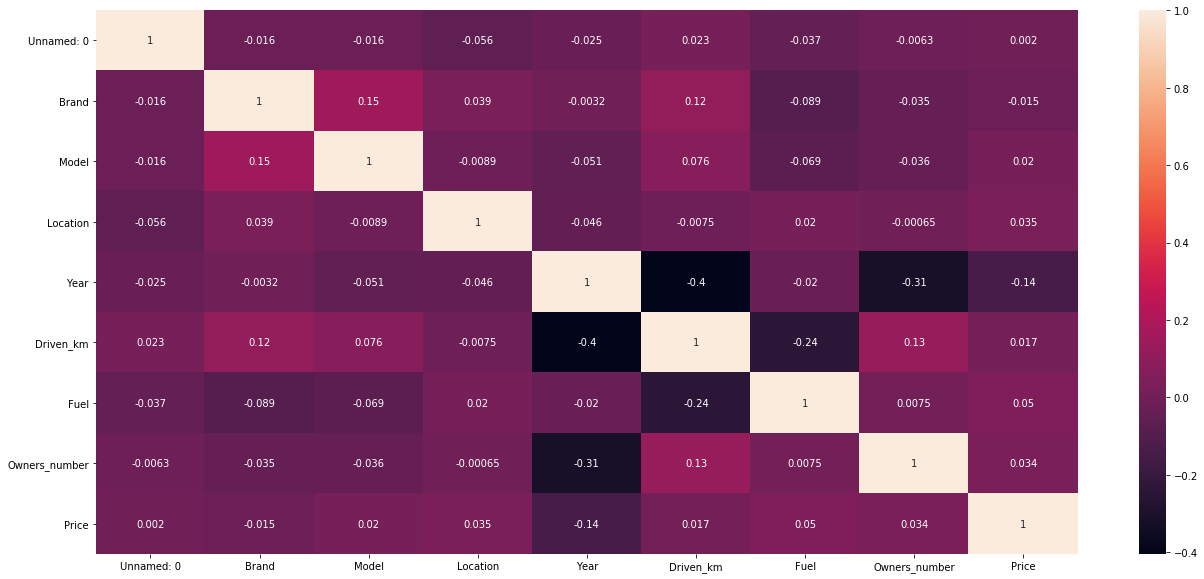

In [27]:
#Checking correlation / Multivariate Analysis
corr=df.corr()
plt.figure(figsize=[22,10])
sns.heatmap(corr,annot=True)
plt.show()

In [28]:
#Checking Correlation with respect to target column
corr['Price'].sort_values()

Year            -0.139502
Brand           -0.015005
Unnamed: 0       0.001987
Driven_km        0.017128
Model            0.020289
Owners_number    0.034311
Location         0.034986
Fuel             0.050098
Price            1.000000
Name: Price, dtype: float64

In [29]:
#Checking Statistical information
df.describe()

,Unnamed: 0,Brand,Model,Location,Year,Driven_km,Fuel,Owners_number,Price
count,5239.000000,5239.000000,5239.000000,5239.000000,5239.000000,5239.000000,5239.000000,5239.000000,5239.000000
mean,2619.000000,16.360947,111.276389,19.381180,2015.189922,55419.780241,2.763314,1.419927,189.338857
std,1512.513361,9.388587,66.150698,13.955828,3.166140,42689.205288,1.995342,0.871263,3707.215262
min,0.000000,0.000000,0.000000,0.000000,1988.000000,0.000000,0.000000,0.000000,1.000000
25%,1309.500000,9.000000,57.000000,8.000000,2013.000000,31000.000000,1.000000,1.000000,4.400000
50%,2619.000000,19.000000,111.000000,13.000000,2016.000000,54000.000000,1.000000,1.000000,7.000000
75%,3928.500000,22.000000,178.000000,32.000000,2017.000000,71663.000000,5.000000,1.000000,14.805000
max,5238.000000,33.000000,227.000000,49.000000,2021.000000,920000.000000,5.000000,5.000000,99000.000000


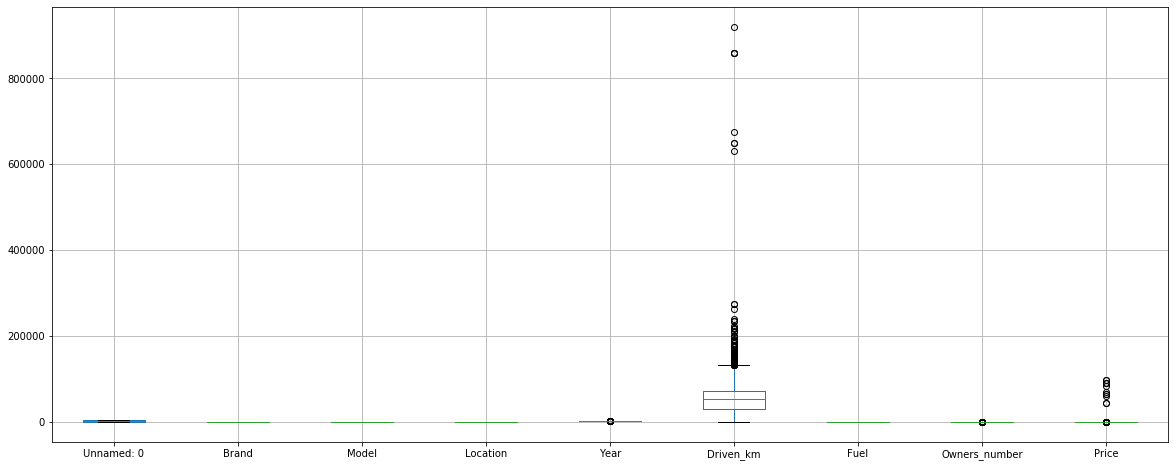

In [30]:
#Checking outliers using boxplots
df.boxplot(figsize=[20,8])

Here, there are some outliers that can effect our readings. so, we need to remove these outliers.

In [31]:
#Improving outliers using zscore
z=np.abs(stats.zscore(df))
df_new=(z<3).all(axis=1)
df=df[df_new] # storing improved datafrme into orignal dataframe                  

In [32]:
#Spliting dataset into independent(x) and target(y) variable 
x=df.drop('Price',axis=1)
y=df['Price']

In [33]:
#Checking skewness of independent valriable
x.skew()

Unnamed: 0      -0.000979
Brand            0.069127
Model            0.163265
Location         0.250798
Year            -0.595061
Driven_km        0.747514
Fuel             0.229623
Owners_number    1.705780
dtype: float64

In [34]:
#Improving skewness
pt=power_transform(x, method='yeo-johnson')
x=pd.DataFrame(pt, columns=x.columns)
x.skew()

Unnamed: 0      -0.290884
Brand           -0.212924
Model           -0.204276
Location        -0.164645
Year            -0.447290
Driven_km       -0.048995
Fuel             0.114726
Owners_number    1.588033
dtype: float64

In [35]:
# Do Scaling for making all values in dataset into one particular range
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)

# Model Building

Lets check the best random state which gives the best accuracy result.

In [36]:
# Finding the best random state
max_score=0
max_state=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    LR=RandomForestRegressor()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    r2score=r2_score(y_test,pred)
    if max_score<r2score:
        max_score=r2score
        random_state=i
        print('r2score is :',max_score,'random_state is :',random_state)

r2score is : 0.9680435026195395 random_state is : 0
r2score is : 0.9812592032027798 random_state is : 2
r2score is : 0.9849872784712207 random_state is : 10
r2score is : 0.9857127574729474 random_state is : 72
r2score is : 0.9861347917652368 random_state is : 116


In [37]:
# Calling train test split method
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.3)

# ML Algorithms

In [38]:
#Doing DecisionTree Regression on dataset
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2_score(y_test,preddtr)

0.9524262085247203

In [39]:
#Doing Random Forest Regression on dataset
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
r2_score(y_test,predrfr)

0.9752339161783247

In [40]:
#Doing AdaBoost Regression on dataset
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
predadb=adb.predict(x_test)
r2_score(y_test,predadb)

0.8086853663025162

# Cross Validation

In [41]:
#Finding Cross validation of DecisionTree Regressor
scr2=cross_val_score(dtr,x,y,cv=5)
print('Cross Validation Score is:',scr2.mean())

Cross Validation Score is: 0.8952264091493316


In [42]:
#Finding Cross validation of Random Forest Regressor
scr3=cross_val_score(rfr,x,y,cv=5)
print('Cross Validation Score is:',scr3.mean())

Cross Validation Score is: 0.9273608664853586


In [43]:
#Finding Cross validation of AdaBoost Regressor
scr3=cross_val_score(adb,x,y,cv=5)
print('Cross Validation Score is:',scr3.mean())

Cross Validation Score is: 0.7291548642272139


# Hyper tunning parameter

In [44]:
#Grid SearchCV
parameter={'n_jobs':np.arange(2,15)}   #Creating parameter list to pass in GridSearchCV
GCV= GridSearchCV(rfr,parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [45]:
#Predicting values from Grid SearchCV
predgcv=GCV.best_estimator_.predict(x_test)
r2_score(y_test,predgcv)

0.9748011794326851

In [46]:
#Save the model
joblib.dump(GCV.best_estimator_,"Car_price.obj")

['Car_price.obj']

# Conclusion

In this dataset we can conclude that as per our observation RandomForest regressor is the best model to predict the target variable of our test dataset. This model gives the best prediction solutions as per other model used above.